In [151]:
from matplotlib import pyplot as plt
import pandas as pd

In [152]:
def read_data(file_path: str) -> pd.DataFrame:
    try:
        data = pd.read_csv(file_path)
        return data
    except FileNotFoundError:
        print(f"File {file_path} not found.")
        return pd.DataFrame()

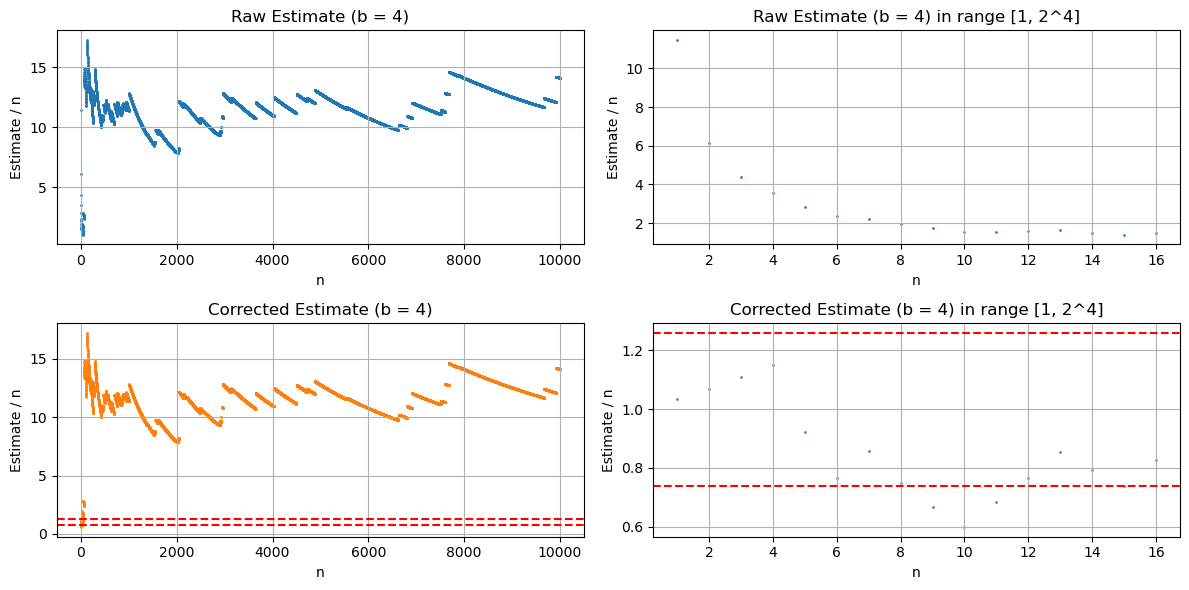

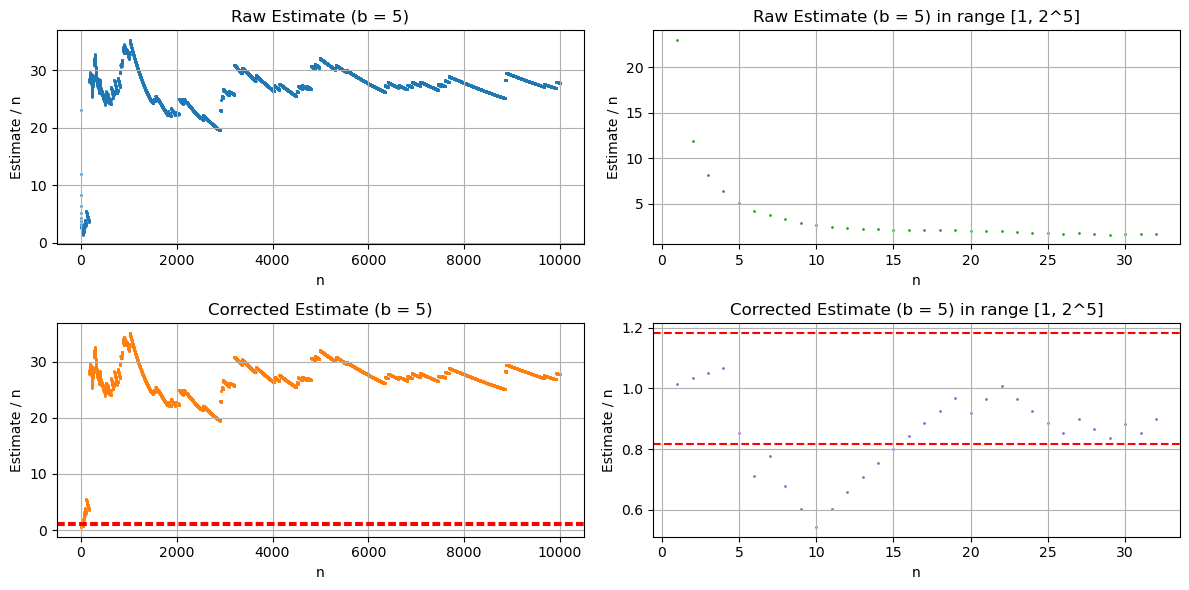

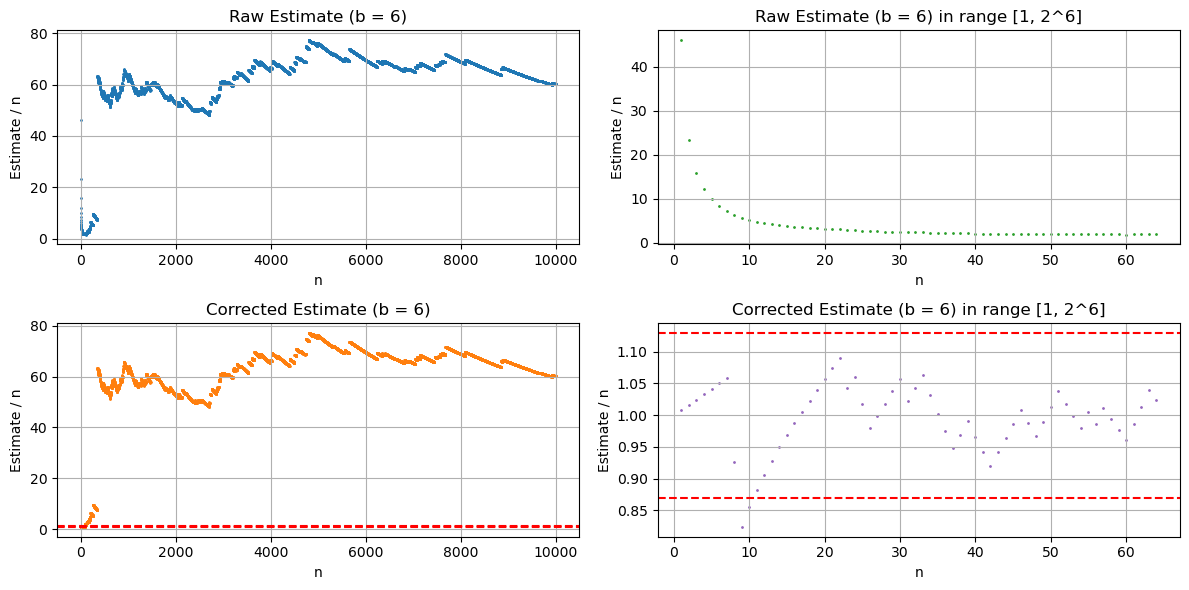

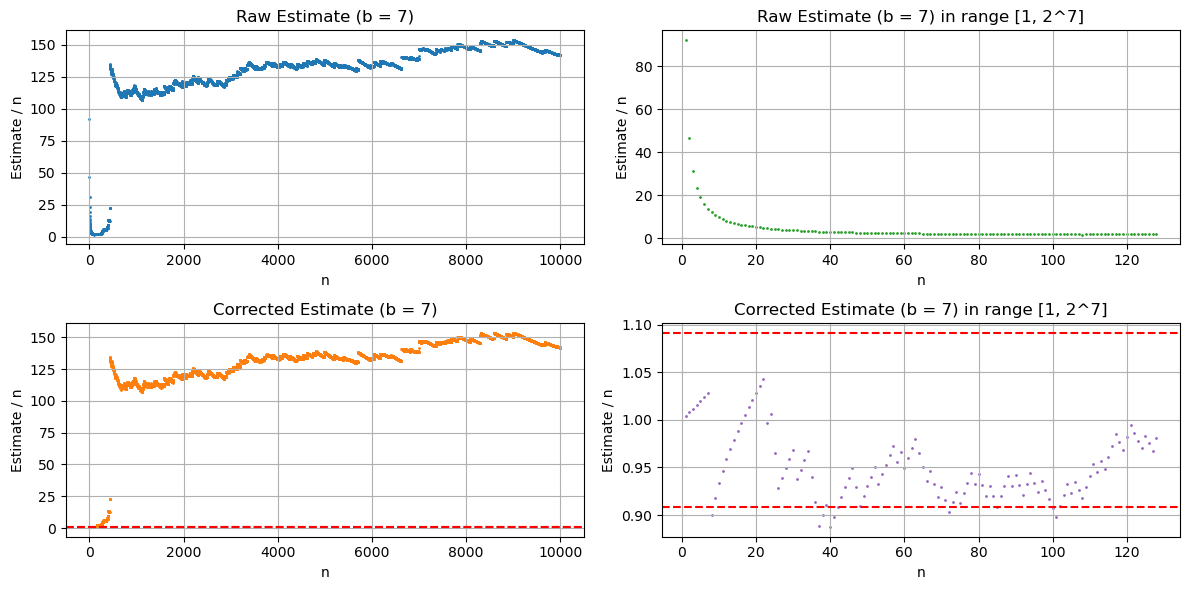

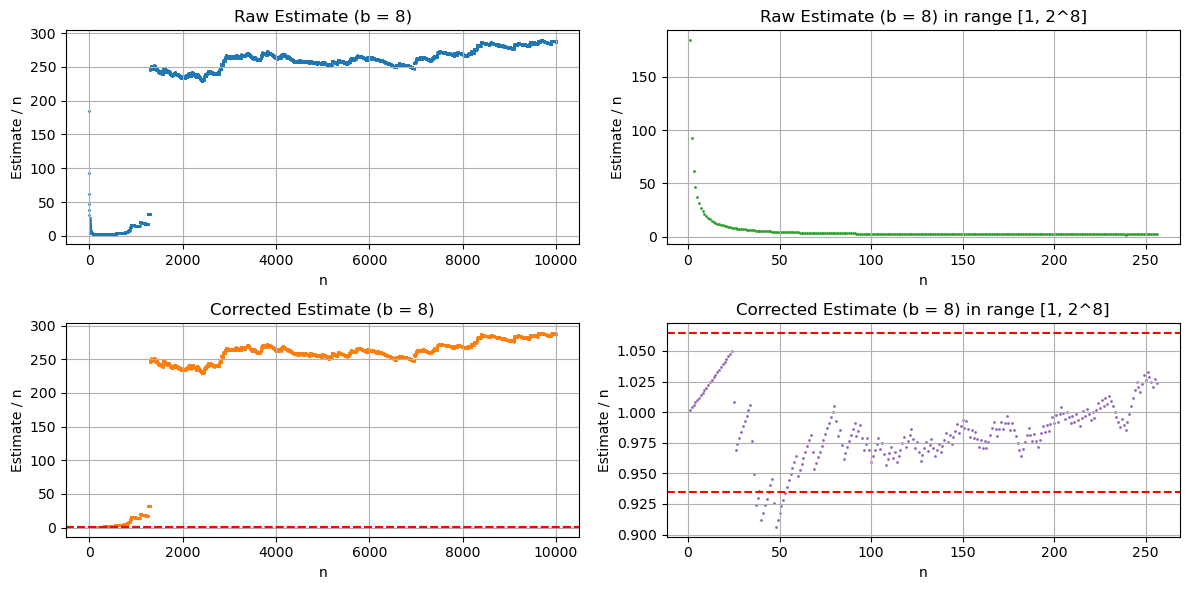

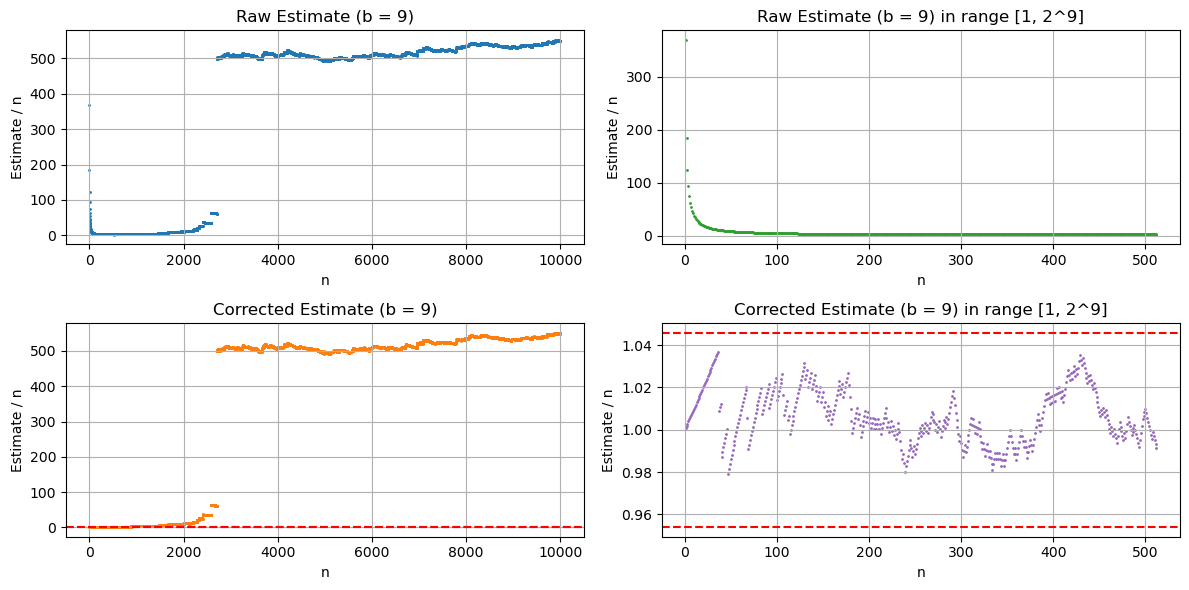

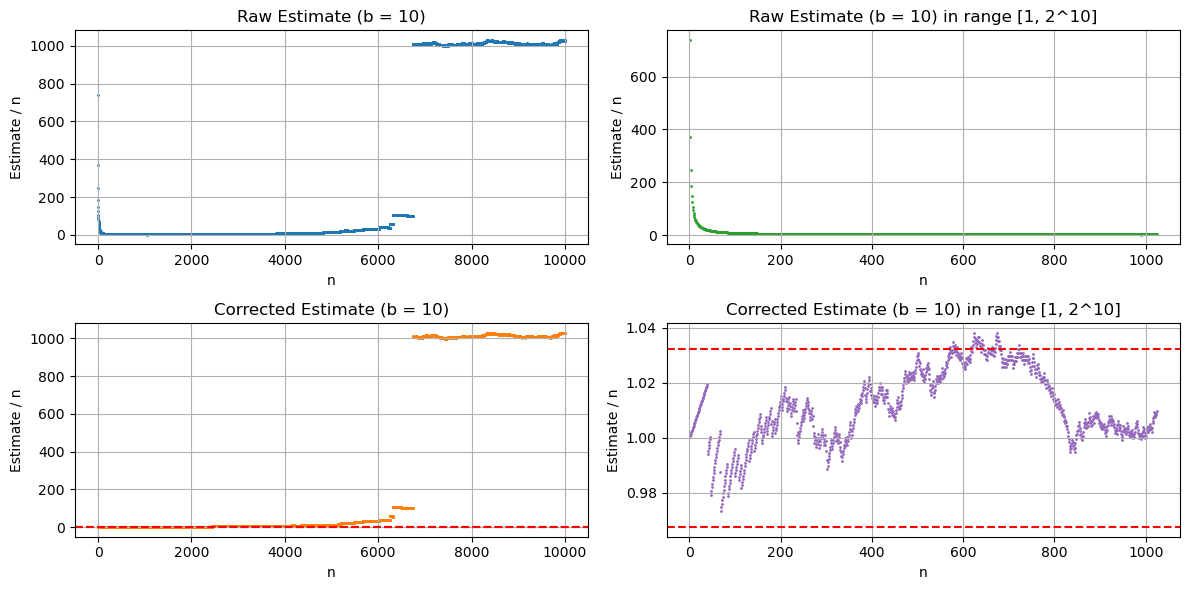

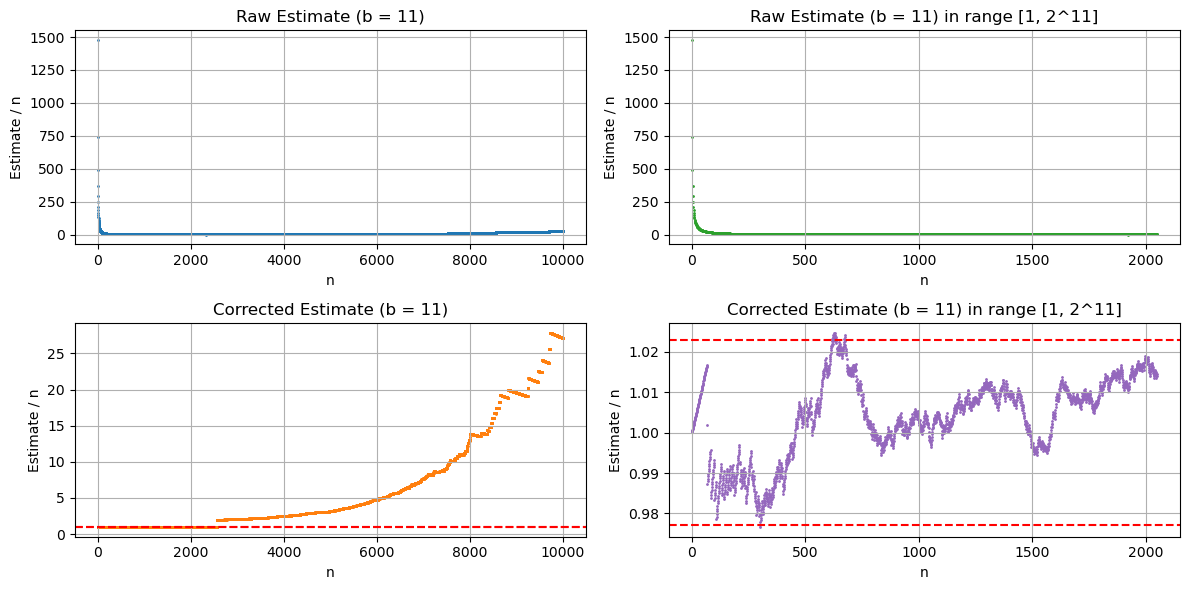

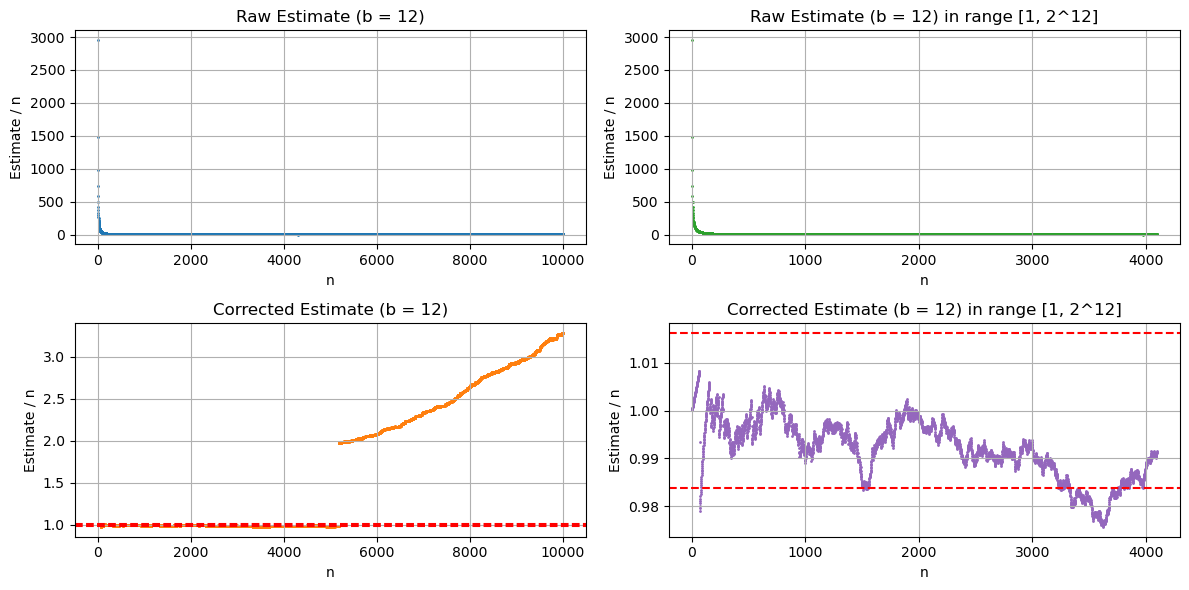

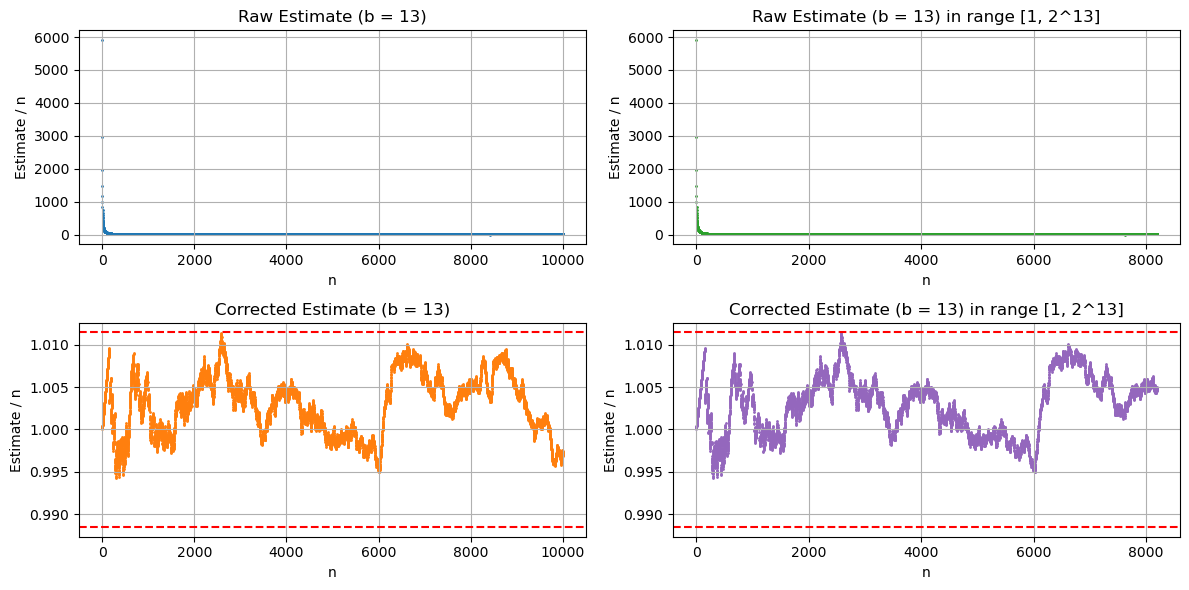

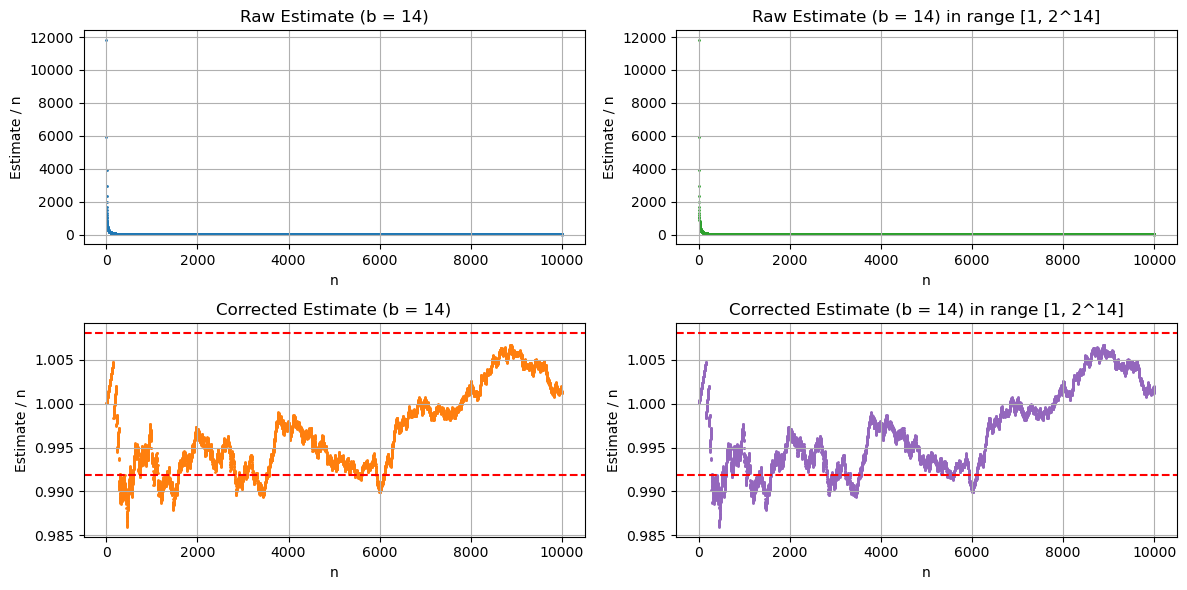

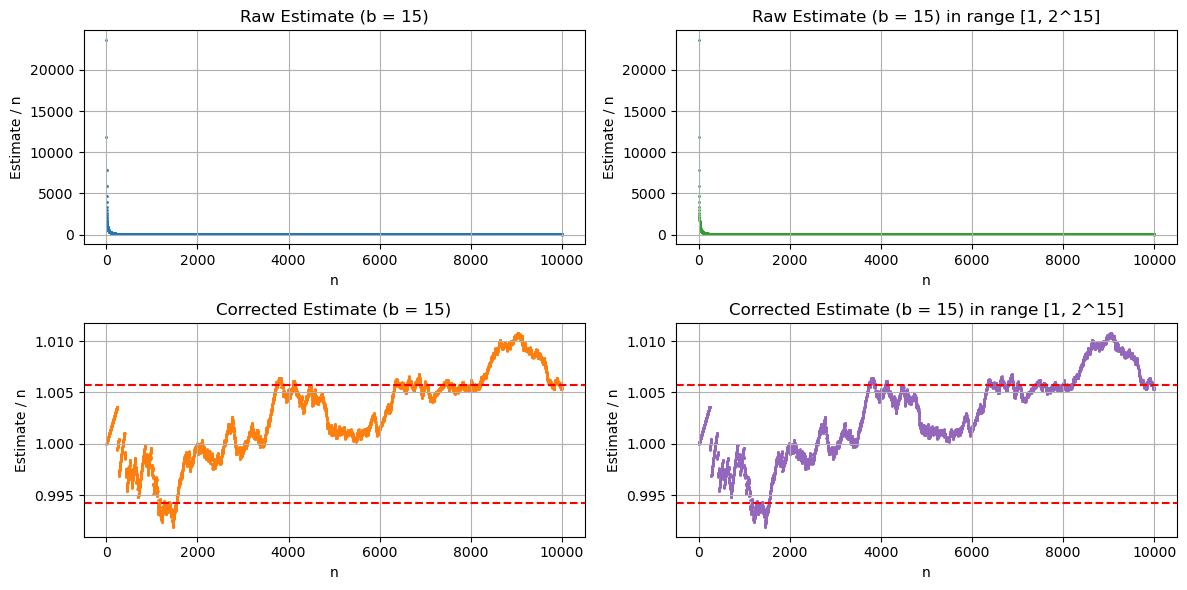

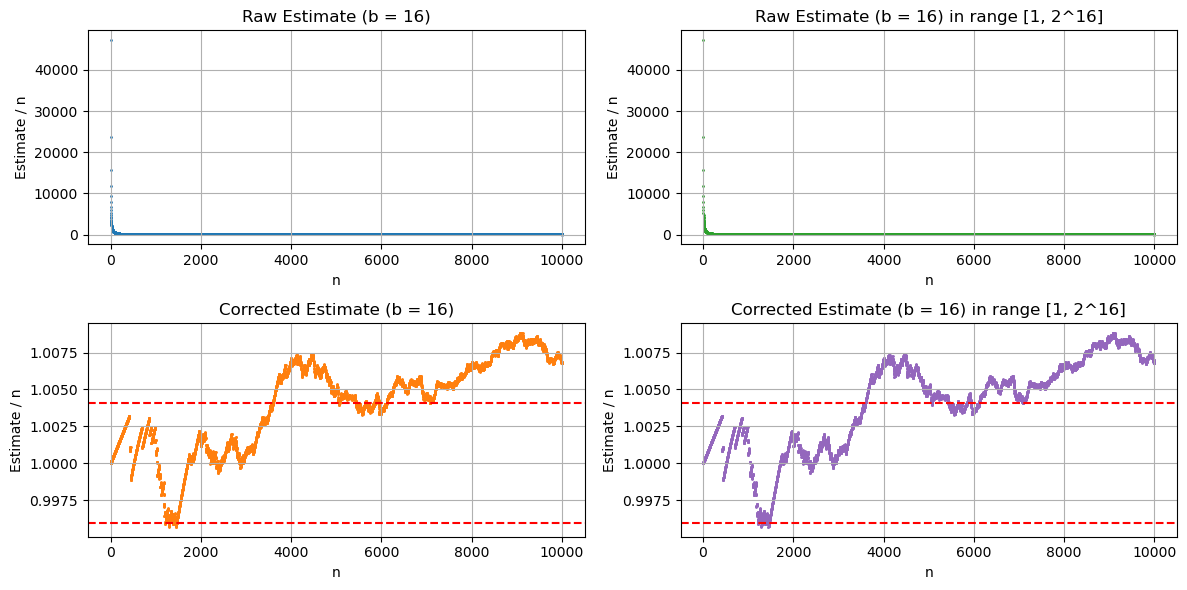

In [178]:
DATA_SOURCE = "zad19.csv"

df = read_data(DATA_SOURCE)
b_values = sorted(list(set(df["b"].values.tolist())))
n_ranges = {
    4: (1, 16),
    5: (1, 32),
    6: (1, 64),
    7: (1, 128),
    8: (1, 256),
    9: (1, 512),
    10: (1, 1024),
    11: (1, 2048),
    12: (1, 4096),
    13: (1, 8192),
    14: (1, 16384),
    15: (1, 32768),
    16: (1, 65536),
}

for b in b_values:
    subset = df[df["b"] == b]
    subset2 = subset[subset["n"].between(*n_ranges[b])]
    m = 2**b
    std = 1.04 / m**0.5
    fig, axs = plt.subplots(2, 2, figsize=(12, 6))
    
    axs[0][0].scatter(subset["n"], subset["raw_estimate"] / subset["n"], s=1, color='tab:blue')
    axs[0][0].set_title(f"Raw Estimate (b = {b})")
    axs[0][0].set_xlabel("n")
    axs[0][0].set_ylabel("Estimate / n")
    axs[0][0].grid()

    axs[0][1].scatter(subset2["n"], subset2["raw_estimate"] / subset2["n"], s=1, color='tab:green')
    axs[0][1].set_title(f"Raw Estimate (b = {b}) in range [1, 2^{b}]")
    axs[0][1].set_xlabel("n")
    axs[0][1].set_ylabel("Estimate / n")
    axs[0][1].grid()

    axs[1][0].scatter(subset["n"], subset["estimate"] / subset["n"], s=1, color='tab:orange')
    axs[1][0].set_title(f"Corrected Estimate (b = {b})")
    axs[1][0].set_xlabel("n")
    axs[1][0].set_ylabel("Estimate / n")
    axs[1][0].grid()
    axs[1][0].axhline(1 - std, color='red', linestyle='--', label='Expected Value')
    axs[1][0].axhline(1 + std, color='red', linestyle='--', label='Expected Value')

    axs[1][1].scatter(subset2["n"], subset2["estimate"] / subset2["n"], s=1, color='tab:purple')
    axs[1][1].set_title(f"Corrected Estimate (b = {b}) in range [1, 2^{b}]")
    axs[1][1].set_xlabel("n")
    axs[1][1].set_ylabel("Estimate / n")
    axs[1][1].grid()
    axs[1][1].axhline(1 - std, color='red', linestyle='--', label='Expected Value')
    axs[1][1].axhline(1 + std, color='red', linestyle='--', label='Expected Value')


    plt.tight_layout()
    plt.show()
